# Search for Higgs bosons in the ZZ decay channel in the four muon final state

This week we will look at how the [Higgs boson](https://en.wikipedia.org/wiki/Higgs_boson) was discovered.

The data we use here are actual, meaningful data from the CMS experiment that confirmed the existence of the Higgs boson, which then resulted in a Nobel prize. The example is based on the original code in [http://opendata.cern.ch/record/5500] on the CERN Open Data portal (Jomhari, Nur Zulaiha; Geiser, Achim; Bin Anuar, Afiq Aizuddin; (2017). Higgs-to-four-lepton analysis example using 2011-2012 data. CERN Open Data Portal. DOI:10.7483/OPENDATA.CMS.JKB8.RR42), and worked to a notebook by Tom McCauley (University of Notre Dame) and Peitsa Veteli (Helsinki Institute of Physics). 

The method used is pretty common for partice physics analyses. First we have some theoretical backgrounds, then we make measurements and try to see if those measurements contain something that correlates or clashes with our assumptions.

Your task is to 

1) Read in the data 

2) Read in simulated background samples 

3) Stack mass histograms of the simulated backgrounds together

4) Study if the simulated backgrounds fit the measured data

5) If not, try to add a simulated signal sample (the production and decay of a Higgs boson to ZZ)

6) Study if the signal + background asumption describes the measured data better

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Read in the measured data.

csvs = [pd.read_csv('4mu_2011.csv'), pd.read_csv('4e_2011.csv'), pd.read_csv('2e2mu_2011.csv')]
csvs += [pd.read_csv('4mu_2012.csv'), pd.read_csv('4e_2012.csv'), pd.read_csv('2e2mu_2012.csv')]

fourlep = pd.concat(csvs)

According to the standard model, one of the ways the Higgs boson can decay is by first creating two Z bosons that then decay further into four leptons (electrons, muons...). It isn't the only process with such a final state, of course, so one has to sift through quite a lot of noise to see that happening. The theory doesn't say too much about what the mass of Higgs could be, but some clever assumptions and enlightened guesses can get you pretty far. For an example, four lepton decay is very dominant in some mass regions, which then guides our search.

278


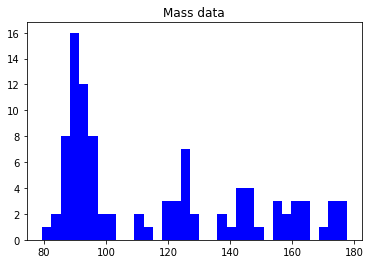

In [8]:
# Consider the mass range from 70 to 180 and plot the mass of the data in a histogram. The variable is fourlep.M.
M = fourlep.M
M = M[(M > 70) & (M < 180)]
plt.hist(M, bins=33, color='b')
plt.title('Mass data')
plt.show()

Let's look at some simulations from other processes there. Here are some simulated values for such events that have already been weighted by luminosity, cross-section and number of events. These values are the number of events in one particular bin of mass. In other words you can use 37 bins for the data and put these simulation values to a bar plot. Bar plots have a handy variable called 'bottom' that can be used to stack bar plots. 

In [5]:
# Read in the simulated backgrounds and simulated signal

dy = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])
ttbar = np.array([0.00465086,0,0.00465086,0,0,0,0,0,0,0,0.00465086,0,0,0,0,0,0.00465086,0,0,0,0,0.00465086,0.00465086,0,0,0.0139526,0,0,0.00465086,0,0,0,0.00465086,0.00465086,0.0139526,0,0])
zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])
hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])


Let's take a look at those numbers and how they contribute to what we'll measure in the accelerator.

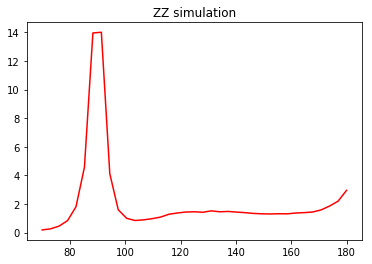

In [6]:
# plot the mass of the ZZ simulated sample

# plot the mass of the ZZ simulated sample
x = np.linspace(70, 180, 37)
plt.plot(x, zz, color='r')
plt.title('ZZ simulation')
plt.show()

DY stands for the Drell-Yan process in which two quarks annihilate creating either a virtual photon or a Z boson which then decays into a lepton-antilepton pair.

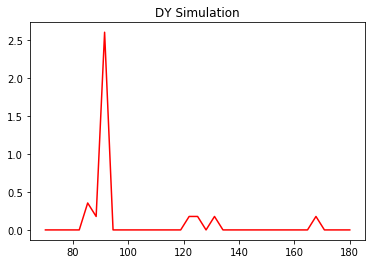

In [7]:
# plot the mass of the DY simulated sample

# plot the mass of the DY simulated sample
x = np.linspace(70, 180, 37)
plt.plot(x, dy, color='r')
plt.title('DY Simulation')
plt.show()

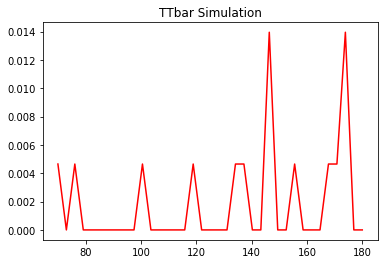

In [9]:
# plot the mass of the ttbar simulated sample

# plot the mass of the ttbar simulated sample
x = np.linspace(70, 180, 37)
plt.plot(x, ttbar, color='r')
plt.title('TTbar Simulation')
plt.show()

Stack now the ZZ, DY and ttbar simulated mass distributions together. This way we get an idea how the mass distribution should look like. At least based on these simulated samples

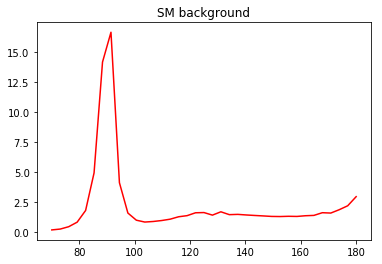

In [10]:


background = np.zeros(len(zz))
for i in range(len(zz)):
    background[i] = zz[i] + ttbar[i] + dy[i]
x = np.linspace(70, 180, 37)
plt.plot(x, background, color='r')
plt.title('SM background')
plt.show()



You should see a peak around 90 GeV. This is the resonance peak of the Z-boson. Add now the measured data to the plot and compare the stack of the simulated backgrounds to the measured data. 

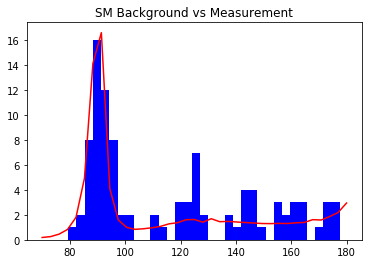

In [11]:
plt.hist(M, bins=33, color='b')
plt.plot(x, background, color='r')
plt.title('SM Background vs Measurement')
plt.show()


There might appear some discrepancies between the simulation and measured data still. This could mean that we are missing a background from our simulation or we could be looking at a signal in our data. Plot now the mass distribution of the signal. 

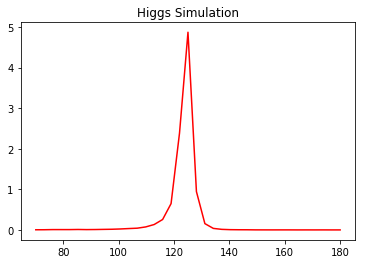

In [12]:
# plot the mass of the HZZ simulated sample, our theoretical assumption of a Higgs boson production and decay via two Z bosons.



# plot the mass of the HZZ simulated sample, our theoretical assumption of a Higgs boson production and decay via two Z bosons.
x = np.linspace(70, 180, 37)
plt.plot(x, hzz, color='r')
plt.title('Higgs Simulation')
plt.show()



Use now the hzz simulated signal sample to try out if that describes the data. In other words plot the hzz sample on top of the stack of background sampels.

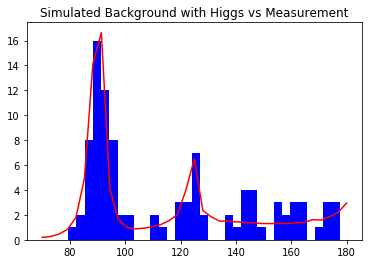

In [13]:
backgroundWithHiggs = np.zeros(len(zz))
for i in range(len(zz)):
    backgroundWithHiggs[i] = zz[i] + ttbar[i] + dy[i] + hzz[i]
x = np.linspace(70, 180, 37)
plt.plot(x, backgroundWithHiggs, color='r')
plt.hist(M, bins=33, color='b')
plt.title('Simulated Background with Higgs vs Measurement')
plt.show()

This sample seems quite small, and by numerical length it is, but it still gives us an enlightening look at how research is done. There aren't very many processes that produce four leptons at the end, so getting even this many comprises about half the data that is publicly available from the 2011-2012 run. More precise information about the data can be found from [here](http://opendata.cern.ch/record/5500).

As we can see, there is certainly some activity going on in the 125 GeV region. This data set is too small to say anything for certain, but it isn't too far off from actual analysis results. You can compare your results to the famous plot from CMS. 
<img src = 'https://cms.cern/sites/cmsexperiment.web.cern.ch/files/styles/large/public/field/image/Fig4-ZZMass_7Plus8TeV_70-180_3GeV.png?itok=g1cCrWTc' align = 'right'>
